# Análise Fatorial PCA

MBA em Data Science e Analytics USP ESALQ

Prof. Dr. Wilson Tarantin Junior

-*- coding: utf-8 -*-

In [3]:
# Instalando os pacotes.

# !pip install pandas
# !pip install numpy
# !pip install factor_analyzer
# !pip install sympy
# !pip install scipy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install pingouin
# !pip install pyshp


In [2]:
# Importando os pacotes necessários.

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import shapefile as shp

In [3]:
# Importando o banco de dados.

url = 'https://github.com/filipecarbonera/MBA_USP_Data_Science_Analytics/raw/main/Factor%20Analysis%20and%20PCA/dados/atlas_ambiental.xlsx'

atlas = pd.read_excel(url)
atlas.head()

,cód_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,2,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,3,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,4,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,5,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


In [4]:
# Informações sobre as variáveis.
atlas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cód_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [5]:
# Estatísticas descritiva das variáveis.
tab_desc = atlas.drop(columns=['cód_ibge']).describe()
tab_desc

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1856.218750,30.478021,7.075000,27.395833,15.992812,0.041146,71.086667,5.932187,99.860104
std,970.774441,23.040243,1.008908,4.385332,4.994409,3.509652,23.315169,7.883762,49.606814
min,159.000000,0.610000,4.800000,20.000000,6.460000,-6.240000,22.680000,0.000000,0.370000
25%,1150.000000,12.400000,6.300000,23.000000,12.960000,-2.042500,56.417499,0.000000,64.317497
50%,1628.000000,24.304999,7.000000,27.000000,16.230000,-0.835000,70.395000,3.015000,96.165001
75%,2315.500000,40.989999,7.850000,31.000000,18.720001,1.342500,82.370001,7.837500,136.222500
max,5146.000000,104.730003,9.200000,36.000000,44.250000,18.120001,127.370003,45.689999,249.600006


In [7]:
# Separando somente as variáveis quantitativas do banco de dados.
atlas_pca = atlas.drop(columns=['cód_ibge', 'distritos'])
atlas_pca.head()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


In [13]:
# Matriz de correlações entre as variáveis.
corr = atlas_pca.corr()

# Gráfico interativo.
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    height = 450,
    width = 700,
    yaxis=dict(autorange="reversed"))

fig.show()

In [14]:
# Teste de Esfericidade de Bartlett.
bartlett, p_value = calculate_bartlett_sphericity(atlas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 748.16
p-valor: 0.0


In [15]:
# Definindo a PCA (procedimento inicial com todos os fatores possíveis).
fa = FactorAnalyzer(n_factors=9, method='principal', rotation=None).fit(atlas_pca)

# Obtendo os eigenvalues (autovalores).
autovalores = fa.get_eigenvalues()[0]

autovalores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

In [17]:
# Parametrizando a PCA para os fatores derivados de autovalores > 1.
fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(atlas_pca)

# Eigenvalues, variâncias e variâncias acumuladas.
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

tabela_eigen

,Autovalor,Variância,Variância Acumulada
Fator 1,4.956031,0.550670,0.550670
Fator 2,1.164338,0.129371,0.680041


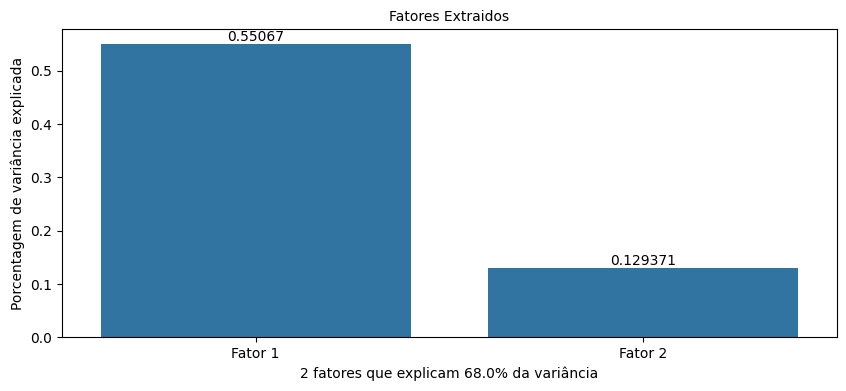

In [20]:
# Gráfico da variância acumulada dos componentes principais.

plt.figure(figsize=(10,4))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen)
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos", fontsize=10)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=10)
plt.ylabel("Porcentagem de variância explicada", fontsize=10)
plt.show()

In [21]:
#%% Determinando as cargas fatoriais.
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = atlas_pca.columns

tabela_cargas

,Fator 1,Fator 2
renda,0.832127,0.368971
quota,0.900606,0.226453
escolaridade,0.966543,-0.024594
idade,0.960135,-0.065447
mortalidade,-0.655699,-0.176634
txcresc,-0.696781,0.337446
causasext,-0.666578,-0.043910
favel,-0.457185,0.442840
denspop,0.166281,-0.793048


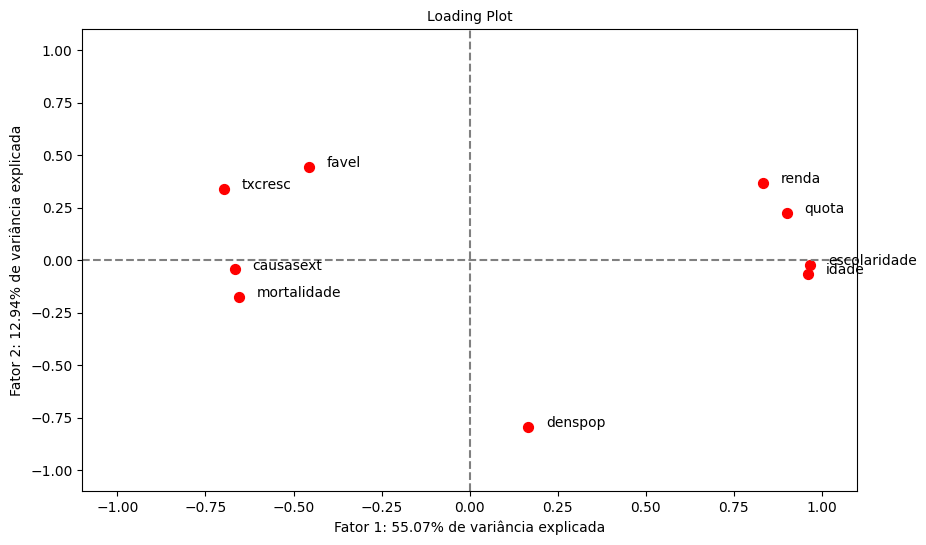

In [24]:
# Gráfico das cargas fatoriais (loading plot).

plt.figure(figsize=(10,6))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=10)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=10)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=10)
plt.show()

In [25]:
# Determinando as comunalidades.
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = atlas_pca.columns

tabela_comunalidades

,Comunalidades
renda,0.828575
quota,0.862372
escolaridade,0.934811
idade,0.926143
mortalidade,0.461141
txcresc,0.599374
causasext,0.446254
favel,0.405126
denspop,0.656574


In [26]:
# Extração dos fatores para as observações do banco de dados.
fatores = pd.DataFrame(fa.transform(atlas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados.
atlas = pd.concat([atlas.reset_index(drop=True), fatores], axis=1)
atlas.head()

,cód_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Fator 1,Fator 2
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.705531
1,2,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565
2,3,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685
3,4,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935
4,5,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607


In [27]:
# Identificando os scores fatoriais.
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = atlas_pca.columns

tabela_scores

,Fator 1,Fator 2
renda,0.167902,0.316893
quota,0.181719,0.194491
escolaridade,0.195024,-0.021122
idade,0.193731,-0.056210
mortalidade,-0.132303,-0.151703
txcresc,-0.140593,0.289818
causasext,-0.134498,-0.037712
favel,-0.092248,0.380336
denspop,0.033551,-0.681115


In [28]:
# Considere que o primeiro fator seja adequado para o ranking de distritos.
dados_mapa = atlas[['cód_ibge', 'distritos', 'Fator 1']].sort_values(by=['cód_ibge'], ascending = True).reset_index(drop=True)
dados_mapa.head()

# Note que adotamos um critério distinto da "soma ponderada".

,cód_ibge,distritos,Fator 1
0,1,Água Rasa,0.682371
1,2,Alto de Pinheiros,1.790304
2,3,Anhanguera,-1.204379
3,4,Aricanduva,-0.257928
4,5,Artur Alvim,-0.205284
